In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from tqdm import tqdm
import cv2
import skvideo.io

In [3]:
file_path = '/Users/julianna/Library/CloudStorage/GoogleDrive-jlamm@fordham.edu/My Drive/datamining/Final Project/sperm_all_BBs.csv'
data = pd.read_csv(file_path, delim_whitespace=True)
data.head()

,frame_name,fid,class,bb0,bb1,bb2,bb3
0,35_frame_0_with_ftid,ckz3w7jvs001b3867v3h4p4s2,0,0.121094,0.175000,0.042188,0.054167
1,35_frame_0_with_ftid,cl4dmy6pl0007356fb5434fln,0,0.084375,0.026042,0.050000,0.047917
2,35_frame_0_with_ftid,cl4dmz269000a356fbourf6gh,0,0.348438,0.048958,0.046875,0.060417
3,35_frame_0_with_ftid,cl4dmzfpu000e356febbq1mdv,0,0.358594,0.110417,0.042188,0.050000
4,35_frame_0_with_ftid,cl4dmznh7000h356fz64w6qfx,0,0.454688,0.176042,0.043750,0.064583


In [4]:
data.head(50)

,frame_name,fid,class,bb0,bb1,bb2,bb3
0,35_frame_0_with_ftid,ckz3w7jvs001b3867v3h4p4s2,0,0.121094,0.175000,0.042188,0.054167
1,35_frame_0_with_ftid,cl4dmy6pl0007356fb5434fln,0,0.084375,0.026042,0.050000,0.047917
2,35_frame_0_with_ftid,cl4dmz269000a356fbourf6gh,0,0.348438,0.048958,0.046875,0.060417
3,35_frame_0_with_ftid,cl4dmzfpu000e356febbq1mdv,0,0.358594,0.110417,0.042188,0.050000
4,35_frame_0_with_ftid,cl4dmznh7000h356fz64w6qfx,0,0.454688,0.176042,0.043750,0.064583
5,35_frame_0_with_ftid,cl4dmzugt000l356fsxuain4w,0,0.525781,0.234375,0.045312,0.064583
6,35_frame_0_with_ftid,cl4dmzzr5000o356f0nurzmg1,2,0.674219,0.192708,0.042188,0.060417
7,35_frame_0_with_ftid,cl4dn074j000r356ft1vyetoc,0,0.865625,0.067708,0.053125,0.068750
8,35_frame_0_with_ftid,cl4dn0l0k000u356f5463x7v8,0,0.229687,0.467708,0.043750,0.056250
9,35_frame_0_with_ftid,cl4dn0osn000x356fvfwvgmvh,0,0.258594,0.525000,0.045312,0.062500


# Explore the Data

## Image Analysis

In [5]:
# folder = '/Users/julianna/drive/My Drive/VISEM_tracking/VISEM_Tracking_Train_v4/Train/'

data_dir = "/Users/julianna/Downloads/VISEM_tracking/VISEM_Tracking_Train_v4/Train/"
folder = data_dir
images_paths = []
# Initialize a list to store the image paths
folder_image_dimensions = {}

# Process folders and get the first image from the 'images' subfolder
for file in tqdm(os.listdir(folder), desc='Processing folders', unit='folder'):
    image_folder = os.path.join(folder, file, 'images')
    
    if os.path.isdir(image_folder):  # Check if the image_folder is actually a directory
        # Get all files in the directory
        files = os.listdir(image_folder)
        
        # Filter for image files if needed (e.g., .jpg, .png)
        image_files = [f for f in files if f.lower().endswith(( '.jpg'))]
        
        if image_files:
            # Sort and take the first image file
            image_files.sort()
            first_image_file = image_files[0]
            
            # Store the full path of the first image
            images_paths.append(os.path.join(image_folder, first_image_file))
            first_image_path = os.path.join(image_folder, first_image_file)

            with Image.open(first_image_path) as img:
                folder_image_dimensions[file] = img.size  # img.size is a tuple (width, height)

# Print the folder names and corresponding image dimensions
for folder_name, dimensions in folder_image_dimensions.items():
    print(f"Folder: {folder_name}, Image Dimensions: {dimensions}")



Processing folders: 100%|██████████████████| 21/21 [00:00<00:00, 144.37folder/s]

Folder: 35, Image Dimensions: (640, 480)
Folder: 60, Image Dimensions: (640, 480)
Folder: 11, Image Dimensions: (640, 480)
Folder: 29, Image Dimensions: (640, 480)
Folder: 19, Image Dimensions: (640, 480)
Folder: 21, Image Dimensions: (640, 480)
Folder: 38, Image Dimensions: (640, 480)
Folder: 36, Image Dimensions: (640, 480)
Folder: 54, Image Dimensions: (640, 480)
Folder: 30, Image Dimensions: (640, 480)
Folder: 52, Image Dimensions: (640, 480)
Folder: 24, Image Dimensions: (640, 480)
Folder: 23, Image Dimensions: (640, 480)
Folder: 15, Image Dimensions: (640, 480)
Folder: 12, Image Dimensions: (640, 480)
Folder: 82, Image Dimensions: (640, 480)
Folder: 47, Image Dimensions: (640, 480)
Folder: 13, Image Dimensions: (640, 480)
Folder: 14, Image Dimensions: (640, 480)
Folder: 22, Image Dimensions: (640, 480)


In [6]:
data['ID'] = data['frame_name'].str.extract(r'(\d+)')

# Display the DataFrame
participant_IDS = np.unique(data['ID'])
participant_dataframes = {}
for participant_ID in participant_IDS:
    participant_data = data[data['ID'] == participant_ID].copy()
    participant_dataframes[participant_ID] = participant_data





# Notes from Article 
All bounding box coordinates are given using the YOLO21 format.
camera pixel pitch = 9.9um
magnification = 400x

Using ImageJ, calculated pixel size to be roughly 480 pixels/mm which corresponds to 0.480 pixels/um

In [7]:
image_j_scale = 0.48 #pixels/um
pixel_size = 1/image_j_scale 
total_duration_seconds = 30
img_w = 640
img_h = 480

def convert_bb(dataframe):
    total_frames = len(np.unique(dataframe['frame_name']))  
    frame_rate = total_frames / total_duration_seconds
    norm_center_x = dataframe['bb0']
    norm_center_y = dataframe['bb1']
    norm_label_width = dataframe['bb2']
    norm_label_height = dataframe['bb3']
    dataframe['center_x_pixels'] = norm_center_x * img_w 
    dataframe['center_y_pixels'] = norm_center_y * img_h
    dataframe['center_x_um'] = participant13['center_x_pixels'] * pixel_size
    dataframe['center_y_um'] = participant13['center_y_pixels'] * pixel_size

    return dataframe
    

In [8]:
image_j_scale = 0.48 # pixels/um
pixel_size = 1 / image_j_scale 
total_duration_seconds = 30
img_w = 640
img_h = 480
window_size = 10

def convert_bb(dataframe, img_w, img_h, pixel_size):
    """
    Converts bounding box coordinates in a dataframe to pixel and micrometer scales.

    Parameters:
    dataframe (DataFrame): DataFrame containing the bounding box coordinates.
    img_w (int): Width of the image in pixels.
    img_h (int): Height of the image in pixels.
    pixel_size (float): Size of one pixel in micrometers.

    Returns:
    DataFrame: The input dataframe with additional columns for pixel and micrometer scales.
    """
    norm_center_x = dataframe['bb0']
    norm_center_y = dataframe['bb1']
    dataframe['center_x_pixels'] = norm_center_x * img_w 
    dataframe['center_y_pixels'] = norm_center_y * img_h
    dataframe['center_x_um'] = dataframe['center_x_pixels'] * pixel_size
    dataframe['center_y_um'] = dataframe['center_y_pixels'] * pixel_size

    return dataframe

def distance_and_sort(dataframe):
    dataframe['frame_number'] = dataframe['frame_name'].str.extract(r'frame_(\d+)').astype(int)
    dataframe_sorted = dataframe.sort_values(by=['fid', 'frame_number'])
    dataframe_sorted['delta_x'] = dataframe_sorted.groupby('fid')['center_x_um'].diff().fillna(0)
    dataframe_sorted['delta_y'] = dataframe_sorted.groupby('fid')['center_y_um'].diff().fillna(0)
    
    return dataframe_sorted


def calc_VSL(dataframe, total_duration_seconds):
    
    dataframe_sorted = dataframe.sort_values(by=['fid', 'frame_number'])

    total_frames = len(np.unique(dataframe['frame_name']))
    frame_rate =  total_frames / total_duration_seconds
    #get last frame
    last_frames = dataframe_sorted.groupby('fid').last()
    #get first frame
    first_frames = dataframe_sorted.groupby('fid').first()
    # subtract the x and y coordinates of the first and last frames to get total displacement
    displacement = abs(last_frames[['center_x_um', 'center_y_um']] - first_frames[['center_x_um', 'center_y_um']])
    #rename columns
    displacement.columns = ['x_displacement', 'y_displacement']
    #get the total time the particle is in the frame (each particle might have different number of frames)
    total_time_in_frame = (last_frames['frame_number'] - first_frames['frame_number']) / frame_rate
    total_displacement = np.sqrt(displacement['x_displacement']**2 + displacement['y_displacement']**2)

    # Calculate VSL
    VSL_df = pd.DataFrame({
#         'total_time': total_time_in_frame,
#         'x_displacement': displacement['x_displacement'],
#         'y_displacement': displacement['y_displacement'],
        'total_displacement': total_displacement,
        'VSL': total_displacement / total_time_in_frame
    })
    
    return VSL_df

def calc_VCL(dataframe, total_duration_seconds): 
    dataframe_sorted = dataframe.sort_values(by=['fid', 'frame_number'])
    dataframe_sorted['delta_x'] = dataframe_sorted.groupby('fid')['center_x_um'].diff().fillna(0)
    dataframe_sorted['delta_y'] = dataframe_sorted.groupby('fid')['center_y_um'].diff().fillna(0)

    # Calculate the time interval between frames (in seconds)
    total_frames = len(np.unique(dataframe['frame_name']))
    frame_rate =  total_frames / total_duration_seconds
    time_interval = 1 / frame_rate
    
    dataframe_sorted['distance'] = (dataframe_sorted['delta_x']**2 + dataframe_sorted['delta_y']**2)**0.5

    total_distance_by_fid = dataframe_sorted.groupby('fid')['distance'].sum()

    # Calculate the total time for each 'fid'
    total_time_by_fid = dataframe_sorted.groupby('fid').size() * time_interval
    frames_present_by_fid  = dataframe_sorted.groupby('fid').size() 

    VCL_df = pd.DataFrame({
        'total_frames': total_frames,
        'frames_present_by_fid': frames_present_by_fid ,
        'total_distance': total_distance_by_fid,
        'VCL': total_distance_by_fid / total_time_by_fid
    })
        
    return VCL_df

def calc_VAP(dataframe, total_duration_seconds, window_size):
    # Sort and calculate smoothed paths
    dataframe_sorted = dataframe.sort_values(by=['fid', 'frame_number'])
    dataframe_sorted['center_x_um_smooth'] = dataframe_sorted.groupby('fid')['center_x_um'].transform(lambda x: x.rolling(window=window_size, center=True).mean())
    dataframe_sorted['center_y_um_smooth'] = dataframe_sorted.groupby('fid')['center_y_um'].transform(lambda x: x.rolling(window=window_size, center=True).mean())

    # Calculate smoothed distances
    dataframe_sorted['delta_x_smooth'] = dataframe_sorted.groupby('fid')['center_x_um_smooth'].diff().fillna(0)
    dataframe_sorted['delta_y_smooth'] = dataframe_sorted.groupby('fid')['center_y_um_smooth'].diff().fillna(0)
    dataframe_sorted['distance_smooth'] = np.sqrt(dataframe_sorted['delta_x_smooth']**2 + dataframe_sorted['delta_y_smooth']**2)

    # Total frames and frame rate calculations
    total_frames = len(np.unique(dataframe['frame_name']))
    frame_rate = total_frames / total_duration_seconds
    time_interval = 1 / frame_rate

    # Calculate total time by fid without adjusting for window size
    total_time_by_fid = dataframe_sorted.groupby('fid').size() * time_interval

    # Calculate VAP using the smoothed path
    distance_sum_smooth = dataframe_sorted.groupby('fid')['distance_smooth'].sum()
    VAP_by_fid = distance_sum_smooth / total_time_by_fid

    # Creating a DataFrame with VAP
    VAP_df = pd.DataFrame({
        'VAP': VAP_by_fid,
    })

    return VAP_df



# Convert bounding box coordinates, Calculated VSL, VAP, VCL

In [9]:
# Update each participant's dataframe

for participant_ID in participant_dataframes:
    #convert bounding boxes from pixel/um
    participant_dataframes[participant_ID] = convert_bb(participant_dataframes[participant_ID], img_w, img_h, pixel_size)
   #sort by frame number and then perform np.diff on x and y coordinates (previous - current)
    participant_dataframes[participant_ID] = distance_and_sort(participant_dataframes[participant_ID])

kinematic_dataframes = {}

# Process each participant's dataframe to calculate VSL
for participant_ID in participant_dataframes:
    #calculate vsl
    vsl_df = kinematic_dataframes[participant_ID] = calc_VSL(participant_dataframes[participant_ID], total_duration_seconds)
    #calculate vcl
    vcl_df = kinematic_dataframes[participant_ID] = calc_VCL(participant_dataframes[participant_ID], total_duration_seconds)
    #calculate vap
    vap_df = kinematic_dataframes[participant_ID] = calc_VAP(participant_dataframes[participant_ID], total_duration_seconds, window_size)

    #merge dataframes containing vsl, vcl, vap on fid
    kinematic_df = pd.merge(vsl_df, vcl_df, on='fid', how='outer')
    kinematic_df = pd.merge(kinematic_df, vap_df, on='fid', how='outer')

    #add class label column

    class_labels_df = participant_dataframes[participant_ID].groupby('fid')['class'].first().reset_index()
    kinematic_df = pd.merge(kinematic_df, class_labels_df, on='fid', how='outer')

    # Store the combined dataframe in the kinematic_dataframes dictionary
    kinematic_dataframes[participant_ID] = kinematic_df
    


# Calculate WOB, LIN, STR from Velocity Metrics

In [10]:
for participant_ID in kinematic_dataframes:
    # Calculate the WOB (Work of Breathing) as a percentage
    kinematic_dataframes[participant_ID]['WOB'] = (kinematic_dataframes[participant_ID]['VAP'] / kinematic_dataframes[participant_ID]['VCL']) * 100
    
    # Replace NaN values with 0 in the WOB column
    kinematic_dataframes[participant_ID]['WOB'].fillna(0, inplace=True)
    
    # Calculate the LIN as a percentage
    kinematic_dataframes[participant_ID]['LIN'] = (kinematic_dataframes[participant_ID]['VSL']/kinematic_dataframes[participant_ID]['VCL'])*100
    kinematic_dataframes[participant_ID]['LIN'].fillna(0, inplace=True)
    
    kinematic_dataframes[participant_ID]['STR'] = (kinematic_dataframes[participant_ID]['VSL']/kinematic_dataframes[participant_ID]['VAP'])*100
    kinematic_dataframes[participant_ID].fillna(0, inplace=True)
    kinematic_dataframes[participant_ID].replace([np.inf, -np.inf], 0, inplace=True)  # Replace inf with 0
    




In [11]:
file_paths = {}
for name, df in kinematic_dataframes.items():
    file_path = f'/Users/julianna/Desktop/kinematic_df/{name}.csv'
    df.to_csv(file_path, index=False)
    file_paths[name] = file_path

# file_paths

{'11': '/Users/julianna/Desktop/kinematic_df/11.csv',
 '12': '/Users/julianna/Desktop/kinematic_df/12.csv',
 '13': '/Users/julianna/Desktop/kinematic_df/13.csv',
 '14': '/Users/julianna/Desktop/kinematic_df/14.csv',
 '15': '/Users/julianna/Desktop/kinematic_df/15.csv',
 '19': '/Users/julianna/Desktop/kinematic_df/19.csv',
 '21': '/Users/julianna/Desktop/kinematic_df/21.csv',
 '22': '/Users/julianna/Desktop/kinematic_df/22.csv',
 '23': '/Users/julianna/Desktop/kinematic_df/23.csv',
 '24': '/Users/julianna/Desktop/kinematic_df/24.csv',
 '29': '/Users/julianna/Desktop/kinematic_df/29.csv',
 '30': '/Users/julianna/Desktop/kinematic_df/30.csv',
 '35': '/Users/julianna/Desktop/kinematic_df/35.csv',
 '36': '/Users/julianna/Desktop/kinematic_df/36.csv',
 '38': '/Users/julianna/Desktop/kinematic_df/38.csv',
 '47': '/Users/julianna/Desktop/kinematic_df/47.csv',
 '52': '/Users/julianna/Desktop/kinematic_df/52.csv',
 '54': '/Users/julianna/Desktop/kinematic_df/54.csv',
 '60': '/Users/julianna/Desk

In [12]:
file_paths = {}
for name, df in participant_dataframes.items():
    file_path = f'/Users/julianna/Desktop/kinematic_df/participant_dataframes/{name}.csv'
    df.to_csv(file_path, index=False)
    file_paths[name] = file_path

file_paths

{'11': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/11.csv',
 '12': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/12.csv',
 '13': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/13.csv',
 '14': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/14.csv',
 '15': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/15.csv',
 '19': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/19.csv',
 '21': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/21.csv',
 '22': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/22.csv',
 '23': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/23.csv',
 '24': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/24.csv',
 '29': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/29.csv',
 '30': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/30.csv',
 '35': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/35.csv',

In [13]:
participant_dataframes['21']

,frame_name,fid,class,bb0,bb1,bb2,bb3,ID,center_x_pixels,center_y_pixels,center_x_um,center_y_um,frame_number,delta_x,delta_y
160530,21_frame_0_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184375,0.166667,0.025000,0.033333,21,118.000000,80.0,245.833333,166.666667,0,0.000000,0.0
160554,21_frame_1_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184346,0.166667,0.025000,0.033333,21,117.981567,80.0,245.794931,166.666667,1,-0.038402,0.0
160578,21_frame_2_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184317,0.166667,0.025000,0.033333,21,117.963134,80.0,245.756528,166.666667,2,-0.038402,0.0
160599,21_frame_3_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184289,0.166667,0.025000,0.033333,21,117.944700,80.0,245.718126,166.666667,3,-0.038402,0.0
160620,21_frame_4_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184260,0.166667,0.025000,0.033333,21,117.926267,80.0,245.679724,166.666667,4,-0.038402,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176188,21_frame_748_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,748,0.000000,0.0
176207,21_frame_749_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,749,0.000000,0.0
176225,21_frame_750_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,750,0.000000,0.0
176243,21_frame_751_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,751,0.000000,0.0


# Visualize Trajectories

In [14]:
# num_participants = len(participant_dataframes)

# plt.figure(figsize=(30, 20 * num_participants))
# axis_label_font_size = 25  # Adjust as needed
# title_font_size = 24   
num_participants = len(participant_dataframes)
axis_label_font_size = 25  # Adjust as needed
title_font_size = 24   

for i, (participant_id, df) in enumerate(participant_dataframes.items(), start=1):
    plt.figure(figsize=(30, 20))
    unique_fids = df['fid'].unique()
    
    for fid in unique_fids:
        particle_df = df[df['fid'] == fid]
        plt.plot(particle_df['center_x_um'], particle_df['center_y_um'], '-', lw=2, label=f'Particle {fid}')
    
    plt.title(f'Trajectories of Particles for Participant {participant_id}', fontsize=title_font_size)
    plt.xlabel('X Position (um)', fontsize=axis_label_font_size)
    plt.ylabel('Y Position (um)', fontsize=axis_label_font_size)
    # plt.legend() can be uncommented if needed
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'Participant_{participant_id}_Trajectories.png')
    plt.close()  # Close the figure after saving to free memory
# plt.tight_layout()
# plt.show()

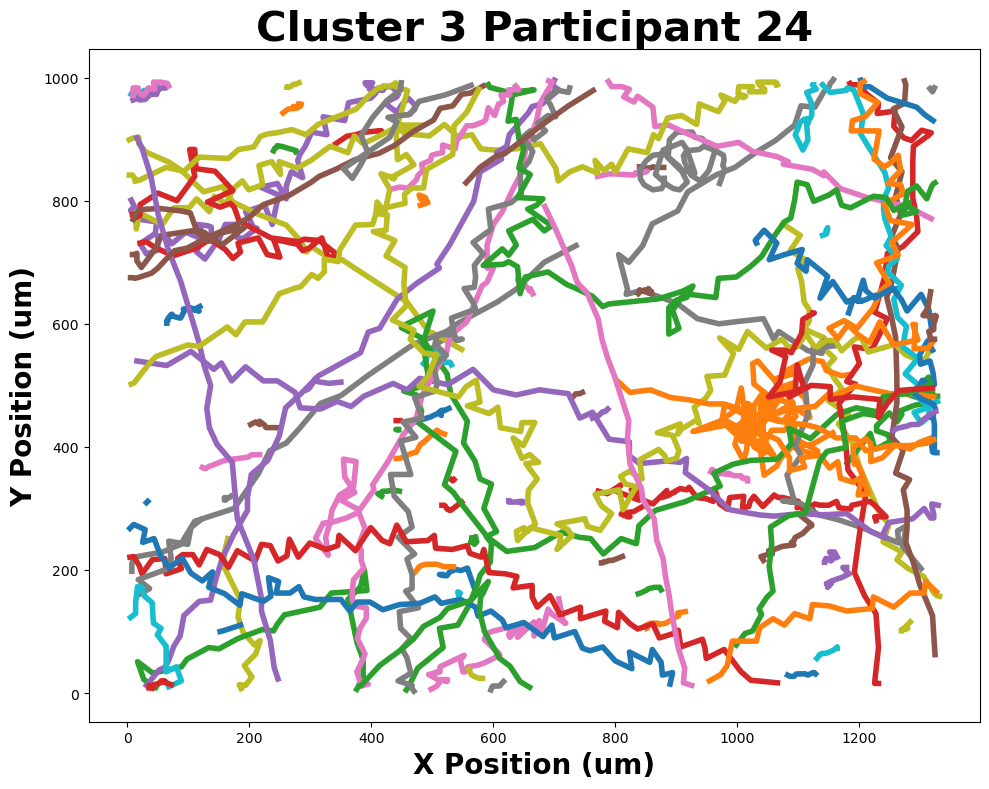

In [51]:
import matplotlib.pyplot as plt

# Replace this with the participant ID you want to plot
selected_participant_id = '24'

plt.figure(figsize=(10, 8))
axis_label_font_size = 20  # Adjust as needed
title_font_size = 24       # Adjust as needed
# tick_label_font_size = 14 
# Check if the selected participant is in the dataframes
if selected_participant_id in participant_dataframes:
    df = participant_dataframes[selected_participant_id]
    unique_fids = df['fid'].unique()
    sample_fids = unique_fids[:]  # Adjust this as needed to plot a subset of trajectories
    
    # Plot only the trajectories for the sampled fids
    for fid in sample_fids:
        particle_df = df[df['fid'] == fid]
        plt.plot(particle_df['center_x_um'], particle_df['center_y_um'], '-', lw=4, label=f'Particle {fid}')


    plt.title(f'Cluster 3 Participant {selected_participant_id}', fontsize=30, fontweight = 'bold')
    plt.xlabel('X Position (um)', fontsize= 20, fontweight = 'bold')
    plt.ylabel('Y Position (um)', fontsize= 20, fontweight = 'bold')
#     plt.xticks(fontsize=tick_label_font_size)
#     plt.yticks(fontsize=tick_label_font_size)
#     plt.legend(fontsize=tick_label_font_size)
#     plt.legend()  # Uncomment this if you want to show the legend

plt.tight_layout()
plt.show()
